In [1]:
import numpy as np
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, accuracy_score

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


train.csv shape is  (139753, 9)
test.csv shape is  (17470, 2)

        Id   ProductId          UserId  HelpfulnessNumerator  \
0   195370  1890228583  A3VLX5Z090RQ0V                     1   
1  1632470  B00BEIYSL4   AUDXDMFM49NGY                     0   
2     9771  0767809335  A3LFIA97BUU5IE                     3   
3   218855  6300215792  A1QZM75342ZQVQ                     1   
4   936225  B000B5XOZW   ANM2SCEUL3WL1                     1   

   HelpfulnessDenominator        Time  \
0                       2  1030838400   
1                       1  1405036800   
2                      36   983750400   
3                       1  1394841600   
4                       1  1163721600   

                                             Summary  \
0                        An Unexplained Anime Review   
1                                         not great.   
2                    Technical problem with this DVD   
3                          Heeeeyyyyy LAAAAADEEE!!!!   
4  Herzog the Great Trave

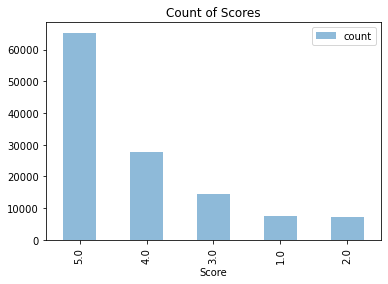

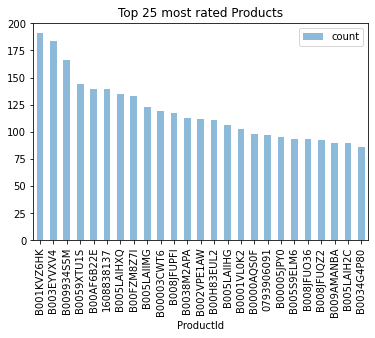

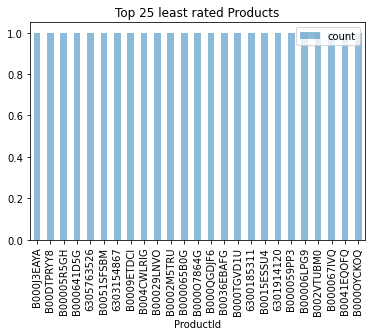

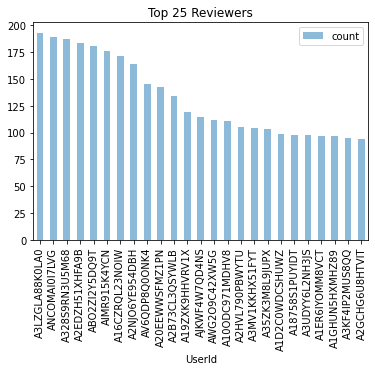

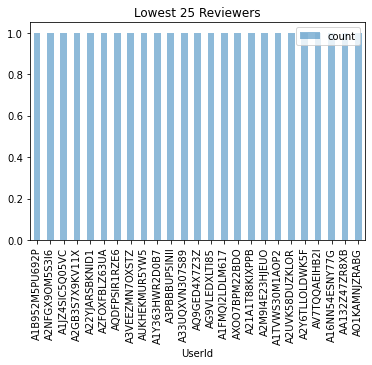

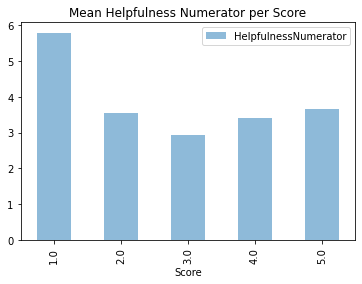

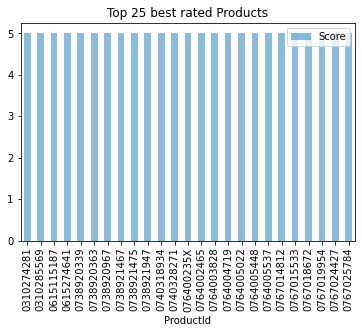

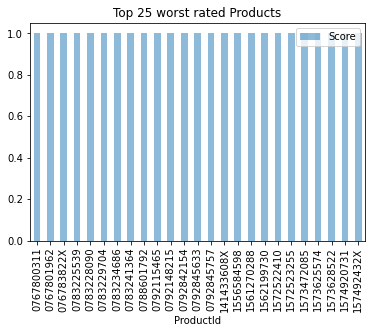

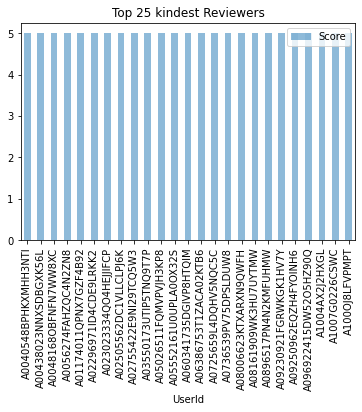

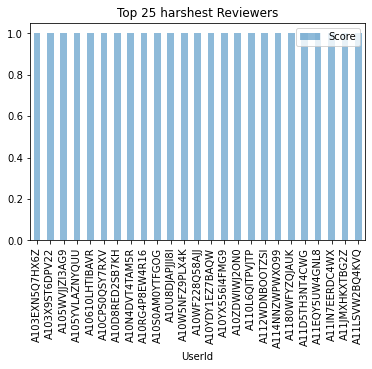

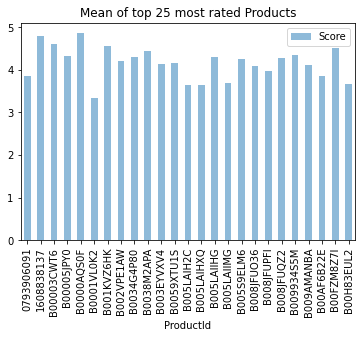

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

trainingSet = pd.read_csv("./data/train.csv")
testingSet = pd.read_csv("./data/test.csv")

print("train.csv shape is ", trainingSet.shape)
print("test.csv shape is ", testingSet.shape)

print()

print(trainingSet.head())
print()
print(testingSet.head())

print()

print(trainingSet.describe())

trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Count of Scores")
plt.show()

trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated Products")
plt.show()

trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated Products")
plt.show()

trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Lowest 25 Reviewers")
plt.show()

trainingSet[['Score', 'HelpfulnessNumerator']].groupby('Score').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean Helpfulness Numerator per Score")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 best rated Products")
plt.show()

trainingSet[['Score', 'ProductId']].groupby('ProductId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 worst rated Products")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nlargest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 kindest Reviewers")
plt.show()

trainingSet[['Score', 'UserId']].groupby('UserId').mean().nsmallest(25, 'Score').plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 harshest Reviewers")
plt.show()

trainingSet[trainingSet['ProductId'].isin(trainingSet['ProductId'].value_counts().nlargest(25).index.tolist())][['Score', 'ProductId']].groupby('ProductId').mean().plot(kind='bar', legend=True, alpha=.5)
plt.title("Mean of top 25 most rated Products")
plt.show()

In [3]:
trainingSet.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,An Unexplained Anime Review,I was very anxious to see the Uncut version of...,2.0
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,not great.,Movie was okay...not great.,3.0
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,Technical problem with this DVD,"Like the Dinosaur Collector's Edition DVD, thi...",1.0
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,Heeeeyyyyy LAAAAADEEE!!!!,"Come on, now..... this has to be, by far, the...",5.0
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,Herzog the Great Traveler of both natural and ...,I've always been a great admirer of Herzog's o...,4.0


In [4]:
print(len(trainingSet['UserId'].unique()))
print(len(trainingSet['ProductId'].unique()))
selected_row = trainingSet[trainingSet['ProductId'] == "1890228583"]
summary = selected_row['Summary']
print(summary)

65269
34026
0                            An Unexplained Anime Review
1327      A very nice OVA with a somewhat familiar story
96196                                  A Little Too Much
118287                            Director's Cut version
Name: Summary, dtype: object


In [5]:
sample = pd.read_csv('./data/sample.csv')
sample.head(20)

,Id,Score
0,786781,4.0
1,17153,4.0
2,1557328,4.0
3,1242666,4.0
4,1359242,4.0
5,576086,4.0
6,964363,4.0
7,646211,4.0
8,1609551,4.0
9,1305948,4.0


In [6]:
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = str(text)
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = " ".join(words)
    return words
    

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import  WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
lemmatizer = WordNetLemmatizer()
def preprocess(text):
    text = str(text)
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stopwords.words('english')]
    words = [lemmatizer.lemmatize(word) for word in words]
    words = " ".join(words)
    return words
    
def process(df):
    # This is where you can do all your processing

    df['Helpfulness'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']
    df['Helpfulness'] = df['Helpfulness'].fillna(0)

    df['ReviewLength'] = df.apply(lambda row : len(row['Text'].split()) if type(row['Text']) == str else 0, axis = 1)
    df['Summary'] = df['Summary'].apply(preprocess)
    df['Text'] = df['Text'].apply(preprocess)

    return df

# Load the dataset
trainingSet = pd.read_csv("./data/train.csv")

# Process the DataFrame
train_processed = process(trainingSet)

# Load test set
# submissionSet = pd.read_csv("./data/test.csv")

# # Merge on Id so that the test set can have feature columns as well
# testX= pd.merge(train_processed, submissionSet, left_on='Id', right_on='Id')
# testX = testX.drop(columns=['Score_x'])
# testX = testX.rename(columns={'Score_y': 'Score'})

# # The training set is where the score is not null
# trainX =  train_processed[train_processed['Score'].notnull()]

# # Save the datasets with the new features for easy access later
# testX.to_csv("./data/X_test.csv", index=False)
# trainX.to_csv("./data/X_train.csv", index=False)


In [5]:
trainX = pd.read_csv('data/X_train.csv')
testX = pd.read_csv('data/X_test.csv')

In [6]:
trainX.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,2.0,0.500000,234
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,3.0,0.000000,4
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,1.0,0.083333,26
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee,come far best jerry lewis movie made full 1960...,5.0,1.000000,157
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,4.0,1.000000,277


In [7]:
import re
def preprocess_2(text):
    text = str(text)
    text = re.sub(r'[0-9]', "", text)
    return text

In [8]:
trainX['Summary'] = trainX['Summary'].apply(preprocess_2)
trainX['Text'] = trainX['Text'].apply(preprocess_2)

In [9]:
trainX['Review'] = trainX['Summary'] + ' ' + trainX['Text']

In [10]:
trainX['Score'].value_counts()

Score
5.0    65313
4.0    27818
3.0    14482
1.0     7361
2.0     7309
Name: count, dtype: int64

In [11]:
def load_glove_embeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            try:
                vector = np.asarray(values[1:], dtype='float32')
                embeddings[word] = vector
            except ValueError:
                # Handle the case when the line cannot be converted to a vector
                print(f"Skipping line: {line}")
    return embeddings

In [12]:
glove_model = load_glove_embeddings('glove/glove.840B.300d.txt')

Skipping line: . . . -0.1573 -0.29517 0.30453 -0.54773 0.098293 -0.1776 0.21662 0.19261 -0.21101 0.53788 -0.047755 0.40675 0.023592 -0.32814 0.046858 0.19367 0.25565 -0.021019 -0.15957 -0.1023 0.20303 -0.043333 0.11618 -0.18486 0.0011948 -0.052301 0.34587 0.052335 0.16774 -0.21384 0.055947 0.24934 -0.12179 0.16749 0.28922 -0.033739 0.3015 -0.13241 0.092635 0.37155 -0.2884 -0.0052731 -0.001005 -0.51153 -0.28476 -0.20139 0.11837 -0.0055891 0.43604 0.16796 -0.2701 0.063957 -0.093253 -0.22079 0.36501 0.06545 0.23941 -0.19292 0.098293 0.12172 -0.1168 -0.027436 0.20507 -0.39139 -0.23111 0.46239 0.22888 -0.028415 -0.1798 0.23817 0.28093 -0.47935 0.23177 -0.35587 0.14246 0.11861 0.011018 0.091986 0.0054809 -0.39955 -0.40183 -0.10629 -0.30851 0.12383 -0.16737 -0.43569 0.4211 -0.57416 -0.19964 0.51312 0.090747 -0.21657 0.043519 0.24288 0.081134 0.49104 -0.33342 -0.31056 -0.3136 0.26931 -0.14402 0.33185 -0.21662 -0.072985 0.080603 -0.7266 -0.098385 -0.36233 -0.25346 0.1154 0.25738 0.15802 -0.1563

Skipping line: . . 0.035974 -0.024421 0.71402 -0.61127 0.012771 -0.11201 0.16847 -0.14069 -0.053491 -0.87539 -0.13959 0.29731 0.072308 -0.084514 -0.1879 0.12358 0.37639 -0.39238 -0.01111 -0.04924 0.63649 0.058814 0.19076 -0.20828 -0.11036 0.14934 0.24667 -0.39438 0.22853 -0.11201 0.33539 -0.32929 -0.049727 -0.090764 0.29095 0.27504 0.22802 -0.15616 0.37302 0.3752 -0.3677 0.1518 -0.27551 -0.63281 -0.31298 -0.22441 -0.15435 -0.64802 0.28404 0.12356 0.0034255 0.03094 0.35345 -0.46781 0.59203 -0.17966 0.27702 -0.46738 0.19438 0.21939 -0.36743 -0.084781 0.03253 -0.51323 -0.55466 0.49585 0.066985 0.47906 -0.25118 0.011123 0.15605 -1.0761 0.60875 -0.15764 0.066122 0.12779 -0.089209 0.4311 0.045732 -0.29364 -0.19994 -0.065952 0.26236 0.34039 -0.4956 -0.41187 0.055566 -0.69902 -0.057696 0.76519 0.2018 -0.34497 -0.22707 0.34316 -0.16098 0.42469 0.0080257 -0.33017 -0.43485 0.23581 -0.71085 0.27985 -0.31261 -0.012817 0.48305 -0.75151 -0.02347 -0.39653 -0.86857 0.2877 0.26678 0.22291 -0.1736 -0.127

Skipping line: contact name@domain.com 0.016426 0.13728 0.18781 0.75784 0.44012 0.096794 0.060987 0.31293 -0.15884 -1.2367 0.43769 0.10465 0.048858 -0.23182 0.71125 0.022376 0.63524 -1.4974 0.12243 -0.07386 -0.021514 -0.37652 0.17503 -0.011225 -0.12668 -0.0090601 0.38418 0.11132 0.15851 -0.47498 0.33619 -0.48833 0.23423 0.13258 0.29362 0.13526 -0.05115 -0.0055236 0.27734 -0.23565 0.19571 -0.29095 0.062419 -0.47502 -0.71402 -0.36384 0.53562 0.40136 0.30963 0.16238 -0.11662 -0.16201 0.30672 0.21663 0.086839 -0.38895 -0.19644 -0.52311 -0.33153 0.27012 -0.89654 -0.15193 0.12447 -0.19112 -0.494 -0.011873 -0.41412 0.52585 0.27316 -0.047525 -0.1178 -0.3371 0.61151 -0.012169 0.36935 0.32679 -0.098269 0.038729 0.003551 -0.51871 -0.48189 -0.079238 -0.34291 -0.44045 -0.24479 0.05593 0.83227 -0.55939 -0.29242 -0.19718 0.17693 -0.12205 0.55837 -0.28505 -0.64676 0.57716 -1.4398 0.066288 -0.086048 0.381 -0.25805 -0.11941 -0.25664 -0.057845 1.0033 -1.0863 0.14343 0.17181 -0.81313 0.19286 0.12922 -0.20

Skipping line: by name@domain.com 0.6882 -0.36436 0.62079 1.1482 -0.055475 -0.37936 0.0064471 -0.33046 -0.43406 -1.3468 0.70312 -0.41314 -0.65868 0.64324 0.13018 0.65846 0.86269 -0.93108 0.3476 0.73912 -0.51405 -0.15113 0.27331 0.51396 -0.74688 0.87989 -0.11887 0.3641 0.37838 0.36177 -0.45182 0.16173 -0.36353 -0.55643 -1.1186 0.70117 -0.48075 0.074095 0.43022 0.4625 0.011133 0.030287 -0.73342 -0.772 0.31058 0.022106 -0.16845 -0.70695 -0.16243 -0.15454 -0.12034 0.018702 0.51626 -0.17255 0.37335 -0.059377 0.013126 -0.30727 0.1581 0.74527 -0.7927 -0.34603 -0.01438 -1.055 -0.95074 -0.81794 0.27925 -0.35405 -0.26783 -0.30391 0.16093 -0.064806 0.69283 -1.1955 0.18414 -0.71183 0.062622 -0.62435 -0.16458 -0.74362 -0.19251 -0.1841 0.99035 -0.20552 -0.46621 0.98506 1.4113 0.024391 -0.14285 0.40063 0.10516 0.065123 -0.4613 0.27429 0.022191 0.55307 0.18442 -0.22378 -0.50433 0.046039 0.12306 -0.11203 -0.30851 -0.13275 -0.36831 -0.63785 -0.99149 -0.55833 0.17128 0.27324 -0.37803 0.4641 0.39427 0.048

Skipping line: at  name@domain.com 0.44321 -0.40005 -0.20065 1.1209 0.34041 0.086082 -0.067128 0.0022702 -0.94649 -1.4669 0.61248 0.34827 -0.20983 -0.61434 0.41102 0.57759 0.69071 -1.9301 0.75265 -0.13238 0.22003 0.28856 0.35234 0.45989 -0.21944 0.1931 -0.11664 0.14996 0.70354 -0.039238 0.55298 -0.53503 -0.3221 -0.28595 -0.1246 0.054544 -0.45937 0.1447 0.8203 -0.33182 0.10864 -0.56552 0.39898 -0.65012 -0.20285 0.11557 0.35711 -0.23958 -0.30281 0.51593 0.71883 -0.30403 0.59458 -0.3217 -0.23967 -0.2576 -0.50224 -0.36055 -0.71763 0.4981 -0.69945 -0.0072578 0.37327 -0.029839 -0.42705 0.93128 -0.046928 0.045162 -0.44879 0.16579 -0.26272 -0.35286 0.17395 -0.24436 -0.1439 -0.39857 0.25342 -0.44737 0.37618 -0.80252 -0.87776 -0.19282 -0.48746 0.065159 -0.24349 -0.77669 0.81629 -0.043888 -0.68276 -0.15709 -0.46533 -0.066009 0.063028 0.090332 -0.81297 0.88979 -0.6391 0.17351 0.3328 -0.30808 0.46158 -0.11289 -0.0261 -0.089243 0.37318 -0.73511 0.19798 -0.060219 -0.12113 -0.2146 0.62061 0.34296 0.89

In [13]:
def get_word_embeddings(text, model, dim=300):
    words = text.split()
    word_vec = [model[word] if word in model else np.zeros(dim) for word in words]
    # Handle the case when there are no embeddings found
    if not word_vec:
        return np.zeros(dim)
    text_embeddings = np.mean(word_vec, axis=0)
    return text_embeddings

In [14]:
trainX['Review_Embeddings'] = trainX['Review'].apply(lambda x: get_word_embeddings(x, glove_model))   

In [17]:
trainX.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Review,Review_Embeddings
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,2.0,0.500000,234,unexplained anime review anxious see uncut ver...,"[-0.13040985, 0.08154165, -0.13446432, -0.0641..."
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,3.0,0.000000,4,great movie okay great,"[-0.0814705, 0.15570676, -0.099272996, -0.1416..."
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,1.0,0.083333,26,technical problem dvd like dinosaur collector ...,"[-0.036677342, 0.03834667, -0.05692123, -0.092..."
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee,come far best jerry lewis movie made full com...,5.0,1.000000,157,heeeeyyyyy laaaaadeee come far best jerry lewi...,"[-0.13289220767978274, 0.06553352673992861, -0..."
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,4.0,1.000000,277,herzog great traveler natural human landscape ...,"[0.022430314661911276, 0.1060550263453577, -0...."


In [18]:
trainX.to_csv('trainx_embeddings.csv')

In [17]:
# trainX['Summary_Embeddings'] = trainX['Summary'].apply(lambda x: get_word_embeddings(x, glove_model))

In [18]:
# summary_embeddings = np.vstack(trainX['Summary_Embeddings'].values)
# text_embeddings = np.vstack(trainX['Text_Embeddings'].values)

In [16]:
# print(summary_embeddings[0])

NameError: name 'summary_embeddings' is not defined

In [19]:
embeddings = np.concatenate([summary_embeddings, text_embeddings], axis=1)

In [50]:
word_counts_sum = Counter()
for sentence in trainX['Summary']:
    words = sentence.split()
    word_counts_sum.update(words)

In [51]:
word_counts_text = Counter()
for sentence in trainX['Text']:
    words = sentence.split()
    word_counts_text.update(words)

In [52]:
top_words_summary = word_counts_sum.most_common(20)

In [53]:
top_words_text = word_counts_text.most_common(100)

In [55]:
def presence_of_top_words_summary(summary):
    word_presence = {word[0]: summary.split().count(word[0]) for word in top_words_summary}
    return pd.Series(word_presence)

feature_vector_sum = trainX['Summary'].apply(presence_of_top_words_summary)

In [56]:
def presence_of_top_words_text(text):
    word_presence = {word[0]: text.split().count(word[0]) for word in top_words_text}
    return pd.Series(word_presence)

feature_vector_text = trainX['Text'].apply(presence_of_top_words_text)

In [57]:
feature_vectors = pd.concat([feature_vector_sum, feature_vector_text], axis=1)

In [62]:
all_fvs = np.concatenate([embeddings, feature_vectors], axis=1)

In [64]:
all_fvs[0]

array([-3.62910032e-01, -6.07399903e-02, -1.94000006e-01, -1.23023339e-01,
       -1.24953300e-01,  2.48335302e-04, -9.86133292e-02,  9.81300101e-02,
        7.74860010e-02,  1.11276329e+00, -2.45980009e-01, -3.15236658e-01,
        2.43180677e-01, -1.06930034e-02,  1.71221662e-02, -3.59656662e-01,
        3.76866646e-02,  8.49743366e-01,  8.20629969e-02, -3.63923341e-01,
        4.43706661e-01, -3.15140009e-01, -2.95950025e-01, -5.31719983e-01,
        1.09633327e-01,  3.41503352e-01,  1.94718644e-01, -2.10170016e-01,
        3.42229992e-01,  1.11813329e-01,  1.51506662e-01,  1.29366666e-02,
       -3.45843315e-01,  2.87523329e-01, -9.44483280e-02,  2.79886335e-01,
       -8.60166550e-02,  1.88173339e-01, -5.95627010e-01, -2.10883185e-01,
       -5.24600036e-02, -3.95203352e-01,  1.07086664e-02,  1.45366013e-01,
        1.66047990e-01,  1.77026674e-01, -1.29276335e-01,  4.12096649e-01,
        7.04133436e-02, -3.71082634e-01,  3.62046733e-02, -2.10441992e-01,
       -1.31980672e-01, -

In [19]:
trainX.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Score,Helpfulness,ReviewLength,Review,Review_Embeddings
0,195370,1890228583,A3VLX5Z090RQ0V,1,2,1030838400,unexplained anime review,anxious see uncut version kite called finally ...,2.0,0.500000,234,unexplained anime review anxious see uncut ver...,"[-0.13040985, 0.08154165, -0.13446432, -0.0641..."
1,1632470,B00BEIYSL4,AUDXDMFM49NGY,0,1,1405036800,great,movie okay great,3.0,0.000000,4,great movie okay great,"[-0.0814705, 0.15570676, -0.099272996, -0.1416..."
2,9771,0767809335,A3LFIA97BUU5IE,3,36,983750400,technical problem dvd,like dinosaur collector edition dvd one wo pla...,1.0,0.083333,26,technical problem dvd like dinosaur collector ...,"[-0.036677342, 0.03834667, -0.05692123, -0.092..."
3,218855,6300215792,A1QZM75342ZQVQ,1,1,1394841600,heeeeyyyyy laaaaadeee,come far best jerry lewis movie made full com...,5.0,1.000000,157,heeeeyyyyy laaaaadeee come far best jerry lewi...,"[-0.13289220767978274, 0.06553352673992861, -0..."
4,936225,B000B5XOZW,ANM2SCEUL3WL1,1,1,1163721600,herzog great traveler natural human landscape,always great admirer herzog oeuvre traveling o...,4.0,1.000000,277,herzog great traveler natural human landscape ...,"[0.022430314661911276, 0.1060550263453577, -0...."


In [31]:
X = np.array([np.array(embeddings) for embeddings in trainX['Review_Embeddings'].values])
y = trainX['Score']

In [26]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=150)
# X_pca = pca.fit_transform(X)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# from xgboost import XGBClassifier
# model_summary = XGBClassifier()
# model_summary.fit(X_summary_train, y_train_encoded)

In [ ]:
# from xgboost import XGBClassifier
# model_text = XGBClassifier()
# model_text.fit(X_text_train, y_train_encoded)

In [ ]:
# summary_predictions = model_summary.predict(X_summary_test)
# text_predictions = model_text.predict(X_text_test)

In [ ]:
# combined_predictions = (summary_predictions + text_predictions) / 2

In [ ]:
# combined_predictions = [int(x) for x in combined_predictions]

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=150)
# model.fit(x_train, y_train_encoded)

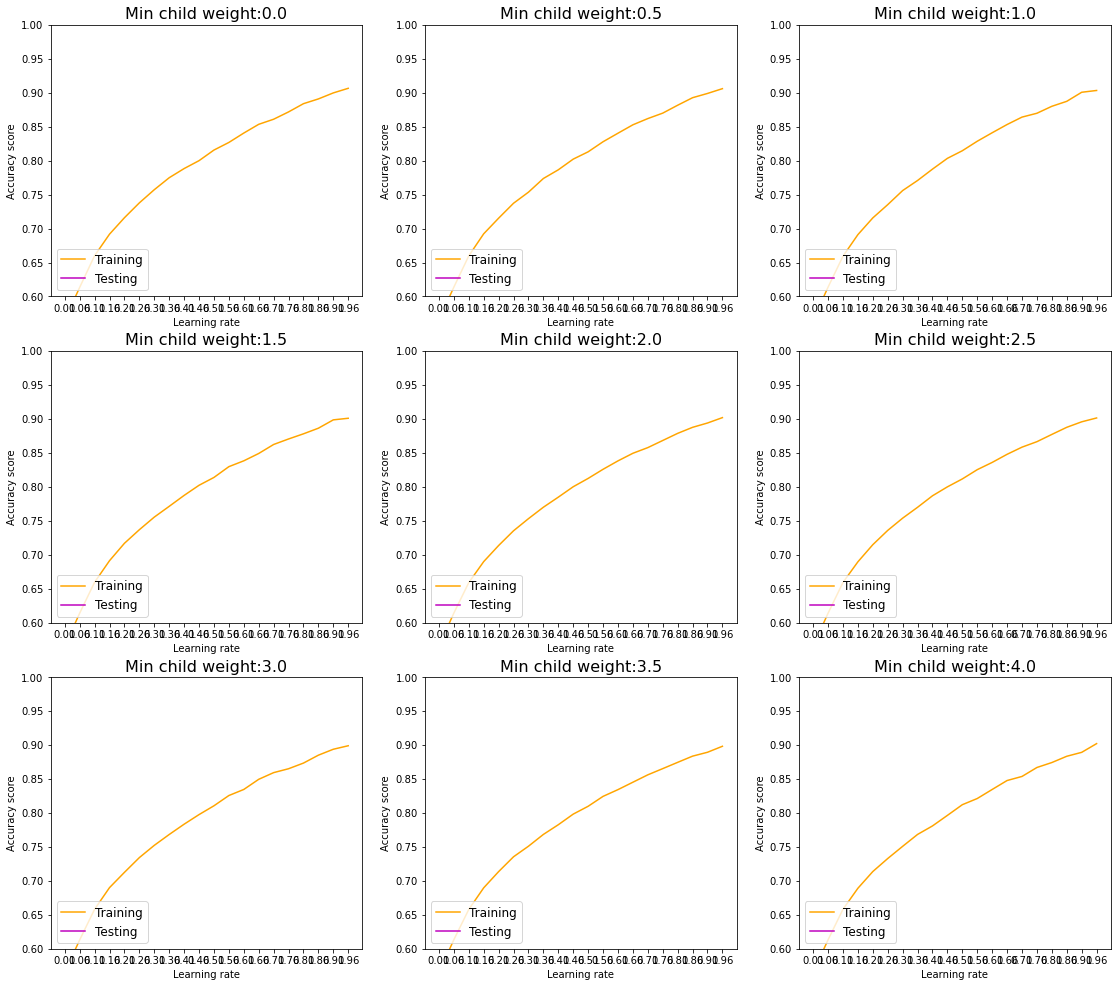

In [88]:
from xgboost import XGBClassifier
fig = plt.figure(figsize=(19, 17))
idx = 1
# learning_rate_range = [0.01, 0.05, 0.1]
weight_range = np.arange(0, 4.5, 0.5)
all_test = []
all_train = []
for weight in weight_range:
    train = []
    test = []
    for lr in learning_rate_range:
        xgb_classifier = XGBClassifier(eta=lr, reg_lambda=1, min_child_weight=weight)
        xgb_classifier.fit(x_train, y_train_encoded)
        train.append(xgb_classifier.score(x_train, y_train_encoded))
        test.append(xgb_classifier.score(x_test, y_test_encoded))
    all_test.append(test)
    all_train.append(train)
    fig.add_subplot(3, 3, idx)
    idx += 1
    plt.plot(learning_rate_range, train, c='orange', label='Training')
    plt.plot(learning_rate_range, test, c='m', label='Testing')
    plt.xlabel('Learning rate')
    plt.xticks(learning_rate_range)
    plt.ylabel('Accuracy score')
    plt.ylim(0.6, 1)
    plt.legend(prop={'size': 12}, loc=3)
    title = "Min child weight:" + str(weight)
    plt.title(title, size=16)
plt.show()


In [93]:
print(test)

[0.5537882814736067, 0.5699390767469437, 0.5757042973381854, 0.5754589688023879, 0.5775442613566668, 0.5767673876599746, 0.5749683117307928, 0.5744776546591978, 0.5719017050333238, 0.5725150263728176, 0.5689986506930531, 0.565645827370487, 0.5660547082634828, 0.5630289896553134, 0.5588992926360551, 0.5586948521895572, 0.5586948521895572, 0.5540744980987038, 0.5491270392934539, 0.549413255918551]


In [38]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(reg_lambda=1, eta=0.2, min_child_weight=2)
# xgb_classifier.fit(x_train, y_train_encoded)

In [76]:
# from xgboost import XGBRFClassifier
# model_xgbrf = XGBRFClassifier()
# model_xgbrf.fit(x_train, y_train_encoded)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, reg_alpha=None, ...)

Accuracy on testing set =  0.6013411293290265
RMSE on testing set =  1.0756631215207266


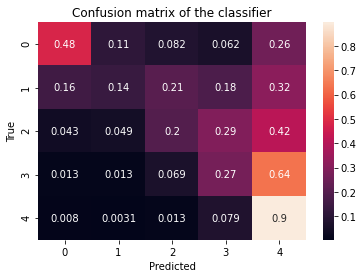

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
# Evaluate your model on the testing set
Y_test_predictions = xgb_classifier.predict(x_test)
print("Accuracy on testing set = ", accuracy_score(y_test_encoded, Y_test_predictions))
print("RMSE on testing set = ", mean_squared_error(y_test_encoded, Y_test_predictions)**0.5)

# Plot a confusion matrix
cm = confusion_matrix(y_test_encoded, Y_test_predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Define the scoring metric for evaluation (accuracy in this case)
scoring = make_scorer(accuracy_score)

# Perform cross-validation and compute accuracy scores for each fold
cv_scores = cross_val_score(xgb_classifier, x_train, y_train_encoded, cv=5, scoring=scoring)

# Print the accuracy scores for each fold
for fold, accuracy in enumerate(cv_scores, start=1):
    print(f"Accuracy on fold {fold}: {accuracy}")

# Calculate and print the mean accuracy across all folds
mean_accuracy = cv_scores.mean()
print(f"Mean accuracy across all folds: {mean_accuracy}")

In [ ]:
testX['Summary'] = testX['Summary'].apply(preprocess)
testX['Text'] = testX['Text'].apply(preprocess)
testX['Summary'] = testX['Summary'].apply(preprocess_2)
testX['Text'] = testX['Text'].apply(preprocess_2)

In [ ]:
testX['Text_Embeddings'] = testX['Text'].apply(lambda x: get_word_embeddings(x, glove_model))   

In [ ]:
testX['Summary_Embeddings'] = testX['Summary'].apply(lambda x: get_word_embeddings(x, glove_model))   

In [ ]:
test_feature_vector_sum = testX['Summary'].apply(presence_of_top_words_summary)

In [ ]:
test_feature_vector_text = testX['Text'].apply(presence_of_top_words_text)

In [ ]:
test_feature_vectors = pd.concat([test_feature_vector_sum, test_feature_vector_text], axis=1)

In [ ]:
summary_embeddings_test = np.vstack(testX['Summary_Embeddings'].values)
text_embeddings_test = np.vstack(testX['Text_Embeddings'].values)

# Concatenate the 2D arrays
X_embeddings = np.concatenate([summary_embeddings, text_embeddings], axis=1)

In [ ]:
x_test_fv = np.concatenate([X_embeddings, test_feature_vectors], axis=1)

In [ ]:
y_preds_text = model_text.predict(summary_embeddings_test)
y_preds_summary = model_summary.predict(text_embeddings_test)
y_preds_combined = (y_preds_text + y_preds_summary) / 2
# y_preds_encoded = label_encoder.inverse_transform(y_preds)
testX['Score'] = [int(pred) for pred in y_preds_combined]
submission = testX[['Id', 'Score']]
submission.to_csv("./data/submission.csv", index=False)

In [ ]:
submission.head(20)